In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from yolo_opencv import get_objects

i = 0

In [11]:
objs = get_objects('IMG_20191030_132812.jpg', config="yolov3.cfg",
                weights="yolov3.weights",
                classes_="yolov3.txt")
image = None
for obj in objs:
    if obj[0] == 'person':
        image = obj[1]

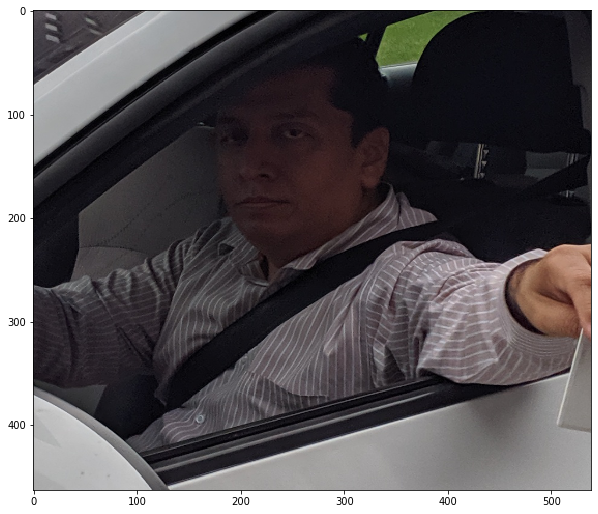

In [12]:
aspect_ratio = image.shape[0] / image.shape[1]
new_size = 500
img = cv2.resize(image, (int(new_size * (1/aspect_ratio)), int(new_size * (1*aspect_ratio))))

fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.equalizeHist(img_gray)

haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')

faces_rects = haar_cascade_face.detectMultiScale(
    img_gray,
    scaleFactor = 1.2,
    minNeighbors = 5)

contour_mask = np.zeros(img_gray.shape,np.uint8)
for (x,y,w,h) in faces_rects:
    cv2.imwrite("face_" + str(i) + ".png", img[y:y+h, x:x+w])
    i = i+1